# **Data Science Jobs in the Greater Philadelphia Area**

## Objective
Analyze the job postings to determine:

1. Desired skills and experience.
2. Payscale for Data Science in this area.
3. What company has the most postings.
4. Areas outside of the city with the most postings.
5. Variations in job title.

## Understanding the Column Data
* Title: job title
* Company: name of company
* Salary: if a salary is listed, it is provided here
* Description: the job description / details of position

## **Code**

### Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
csv = '/content/drive/My Drive/datasets/indeed/data-science.csv'
df = pd.read_csv(csv)
df.head()

,Title,Company,Location,Salary,Description
0,Data Engineer,NSM Insurance Group,"Conshohocken, PA 19428",None,Overview:\nThe NSM Insurance Group’s Strategic...
1,Jr. Big Data Engineer,Enhance IT,Pennsylvania,None,Big Data Engineer\nFull-Time. Multiple Locatio...
2,Data Engineer,ClientSolv Technologies,"Philadelphia, PA",$55 - $65 an hour,ClientSolv Technologies is an IT solution firm...
3,Data Scientist,HSN,"West Chester, PA",None,Our Data Scientist is responsible for in-depth...
4,Director Data Science,Penfield Search Partners,"Philadelphia, PA",None,Responsibilities\nGather data collection requi...


## Job Titles

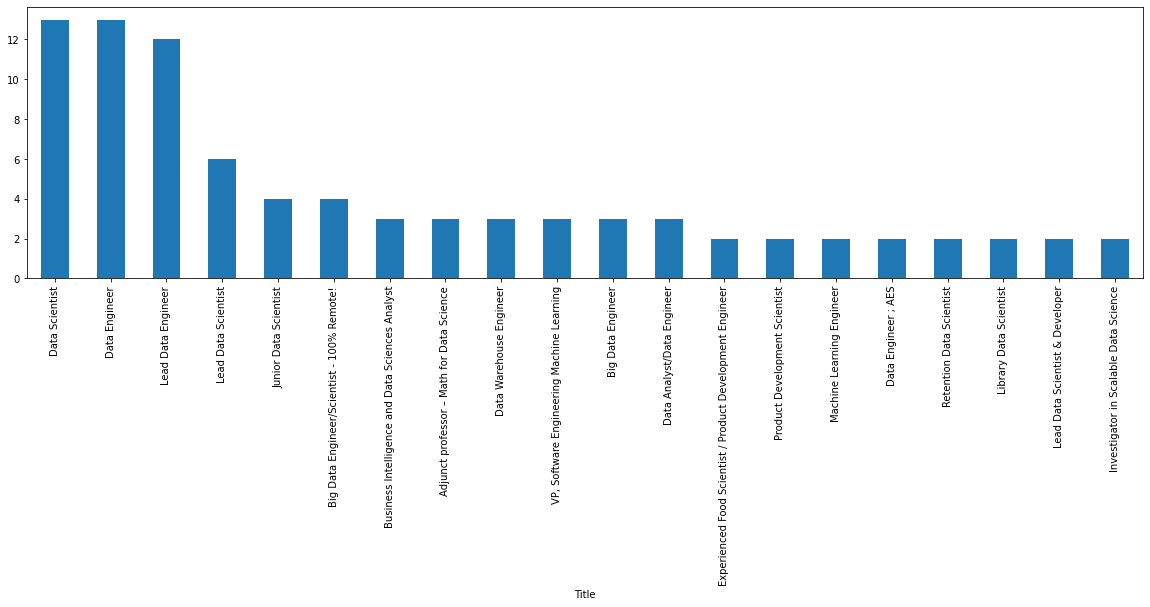

In [4]:
top_jobs = df.groupby("Title").count()["Company"].sort_values(ascending=False)[:20]
top_jobs.plot(kind="bar", figsize=(20,5))

## Companies

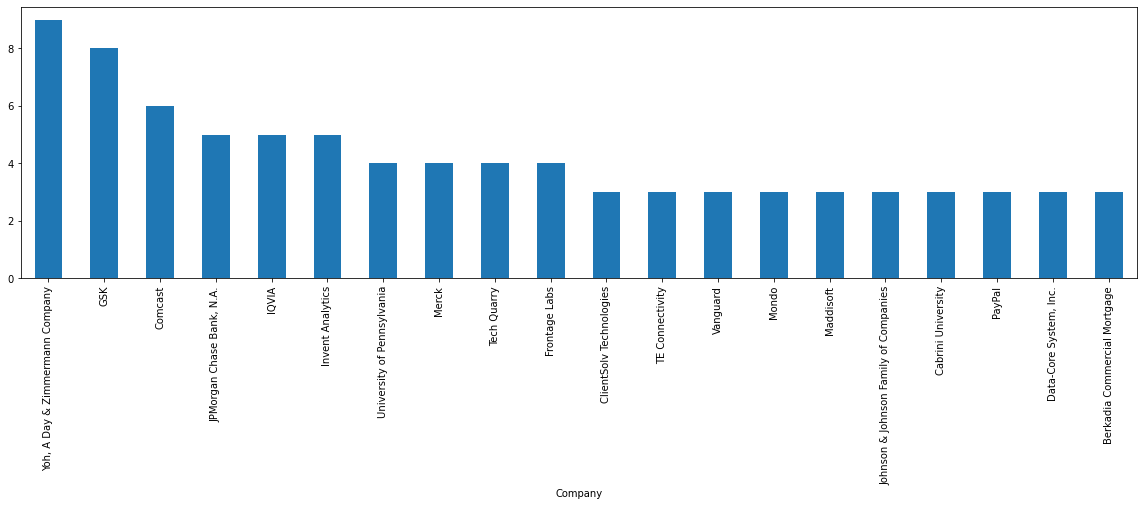

In [5]:
top_companies = df.groupby("Company").count()["Title"].sort_values(ascending=False)[:20]
top_companies.plot(kind="bar", figsize=(20,5))

## Locations

In [6]:
top_locations = df.groupby("Location").count()["Title"].sort_values(ascending=False)[:20]
top_locations

Location
Philadelphia, PA                                  40
Wayne, PA 19087                                    9
Philadelphia, PA 19103 (Logan Square area)         8
Wilmington, DE                                     7
Conshohocken, PA 19428                             6
Collegeville, PA 19426                             6
Philadelphia, PA 19107 (City Center East area)     5
Philadelphia, PA 19112 (Navy Yard area)            5
Wayne, PA                                          5
Exton, PA                                          4
Malvern, PA                                        4
Plymouth Meeting, PA 19462                         4
United States                                      4
Fort Washington, PA 19034                          4
Philadelphia, PA 19102 (City Center West area)     4
West Point, PA                                     4
Berwyn, PA 19312                                   4
Ambler, PA 19002                                   3
Radnor, PA 19087                     

## Salary

In [7]:
def format_salary(row):
    salary = row["Salary"]
    if "-" in salary:
        split = salary.split("-")
        salary_min = split[0]
        salary_max = split[1]
    else:
        salary_min = salary
        salary_max = salary
    
    row["salary_min"] = salary_min.replace("$","").replace("a month","").replace("a year","").replace(",","")
    row["salary_max"] = salary_max.replace("","").replace("a month","").replace("a year","").replace(",","")
       
    if "month" in row["Salary"]:
        row["salary_min"] = int(row["salary_min"])*12
        row["salary_max"] = int(row["salary_max"])*12
    
   
    return row


df_salary = df[df["Salary"]!= "None"].dropna()
df_salary = df_salary.apply(format_salary,axis=1) 

df_salary["salary_min"] = pd.to_numeric(df_salary["salary_min"],'coerce')
df_salary["salary_max"] = pd.to_numeric(df_salary["salary_max"],'coerce')

df_salary["salary_min"].mean()

84326.2

In [8]:
top_munnies = df.groupby("Salary").count()["Title"].sort_values(ascending=False)[:20]
top_munnies

Salary
None                          154
$145,000 a year                 9
$80 - $115 an hour              4
$107,000 - $130,000 a year      3
From $85,000 a year             1
$75 - $85 an hour               1
$74 - $76 an hour               1
$60,000 - $80,000 a year        1
$55 - $65 an hour               1
Name: Title, dtype: int64

## Desired Experience

In [20]:
def cleanData(desc):
    desc = word_tokenize(desc)
    desc = [word.lower() for word in desc if word.isalpha()]
    desc = [word for word in desc if word not in stop_words]
    return desc

In [21]:
stop_words = stopwords.words('english')
tags_df = df["Description"].apply(cleanData)
result = tags_df.apply(Counter).sum().items()
result = sorted(result, key=lambda kv: kv[1],reverse=True)
result_series = pd.Series({k: v for k, v in result})


### Visualization

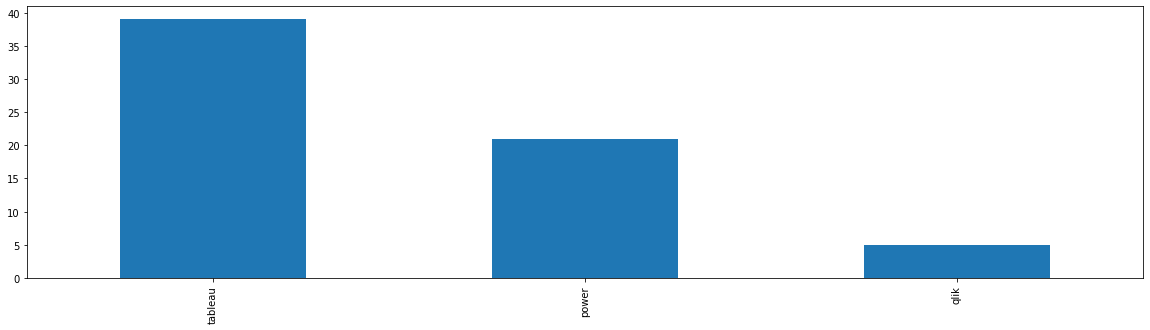

In [16]:
skills = ["tableau","power","qlik"]
filter_series = result_series.filter(items=skills)
filter_series.plot(kind='bar',figsize=(20,5))

### Libraries

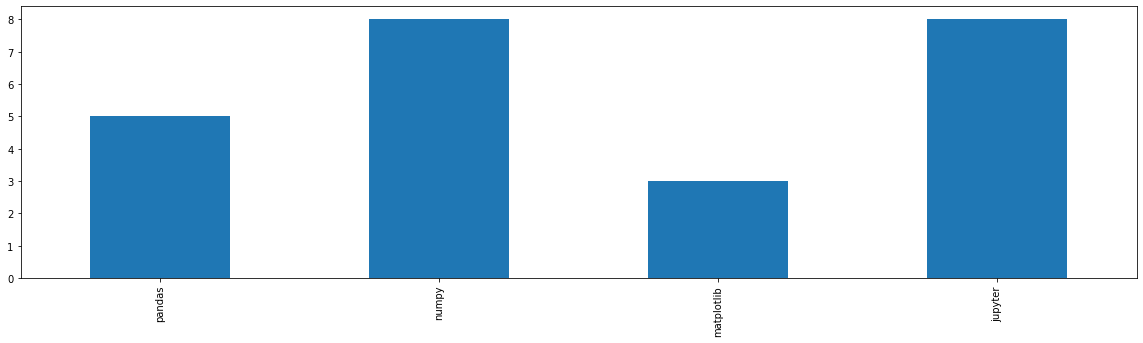

In [11]:
skills = ["nltk","pandas","numpy","matplotlib","jupyter","opencv"]
filter_series = result_series.filter(items=skills)
filter_series.plot(kind='bar',figsize=(20,5))

### Keywords

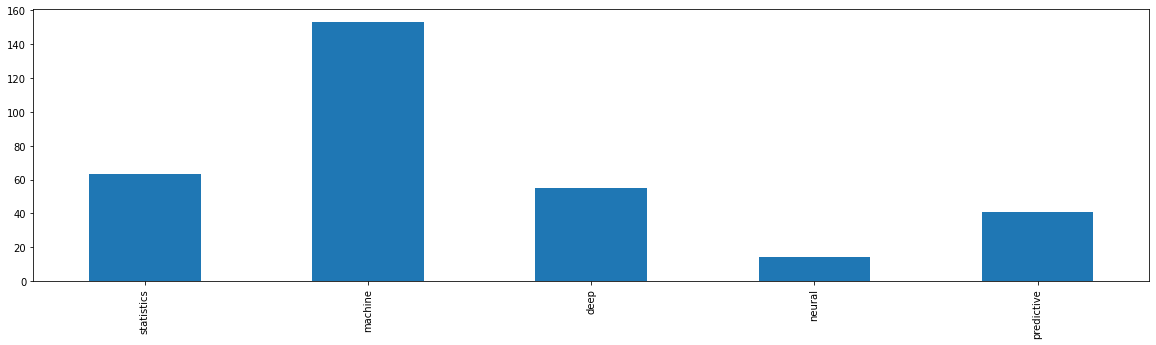

In [12]:
skills = ["statistics","machine","deep","neural","predictive"]
filter_series = result_series.filter(items=skills)
filter_series.plot(kind='bar',figsize=(20,5))

### Cloud

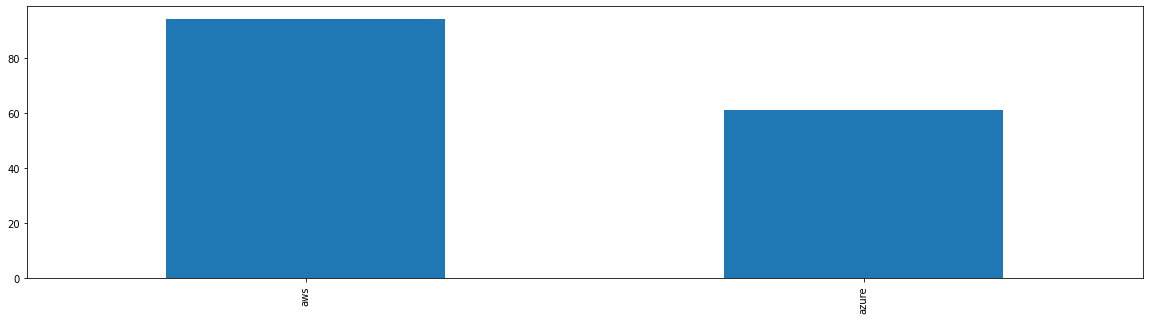

In [13]:
skills = ["aws","azure"]
filter_series = result_series.filter(items=skills)
filter_series.plot(kind='bar',figsize=(20,5))

### Programming, Scripting, and Markup Languages

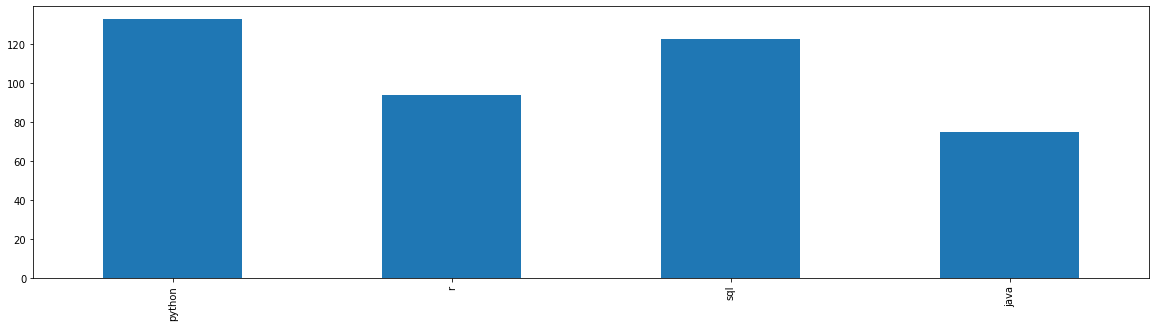

In [22]:
skills = ["python", "r", "sql",  "java", ]
filter_series = result_series.filter(items=skills)
filter_series.plot(kind='bar',figsize=(20,5))

### Platforms

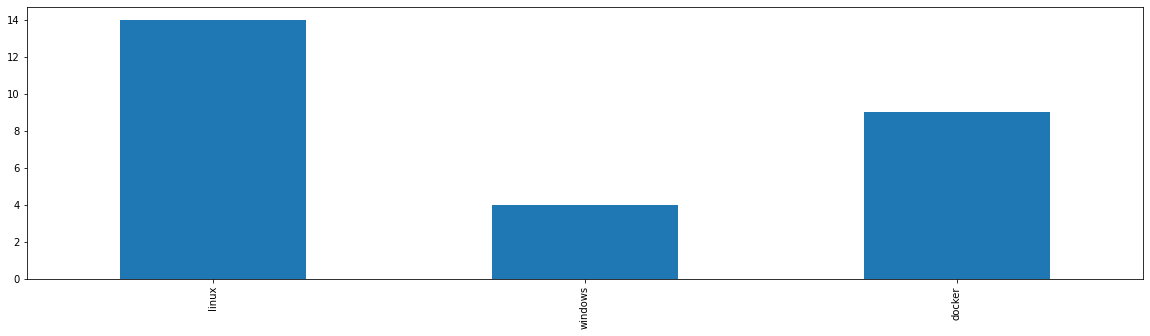

In [18]:
skills = ["linux", "windows", "macos","docker"]
filter_series = result_series.filter(items=skills)
filter_series.plot(kind='bar',figsize=(20,5))

### Bash / Shell / PowerShell

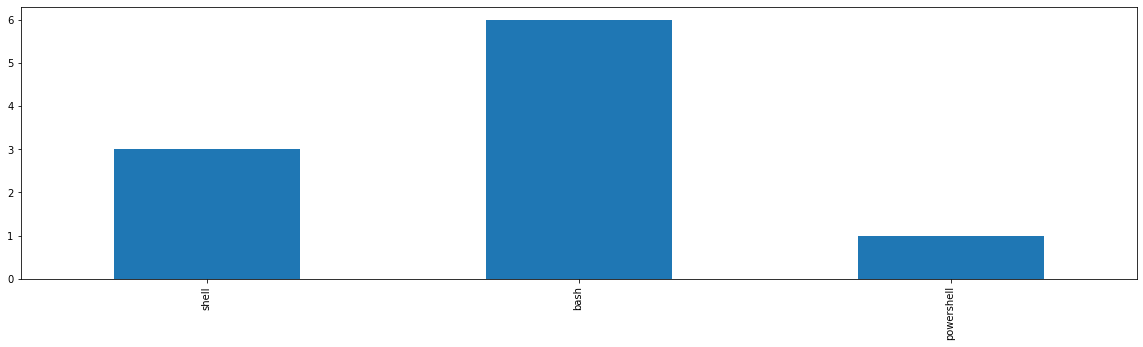

In [19]:
skills = ["shell", "bash", "powershell"]
filter_series = result_series.filter(items=skills)
filter_series.plot(kind='bar',figsize=(20,5))

## **Summary**
* Top Experience: 
  * Tableau
  * Numpy
  * Machine
  * AWS
  * Python
  * Linux
  * Bash


* Top Money Stats:
  * Average salary for a Senior Software Developer is $84,326.20

  * The most common pay range is $145,000 a year

* Top Companies:
  * Day & Zimmermann
  * GSK
  * Comcast

* Top Locations:
  * Wayne, PA
  * Conshohocken, PA
  * Collegeville, PA

* Top Positions:
  * Data Scientist
  * Data Engineer
  * Lead Data Engineer / Data Scientist

## **Conclusion**
Individuals in Data Science should focus on Machine Learning, Tableau, Jupyter, Python, AWS, Linux and Bash. It also will be beneficial to know some Java, SQL, and Docker.

Data Scientists / Engineers are are somewhat well paid in the Greater Philadelphia Area. The average base pay is $84,326.20 per year, which is lower than what Glassdoor provides (97,921). The most common pay range is 145,000 per year, so getting over 100,000 per year is achievable with the right experience and skillset.

The top company is Day & Zimmermann, which operates in several fields including construction, engineering, and staffing. Overall, the top industries seem to be Research, Pharmaceutical, Telecommunications, and Finance. Having a background in Pharmaceuticals especially, or any other listed industries will benefit Data Scientists in the area.

As for locations, the city of Philadelphia has the most jobs. If an indivdual is planning on working outside of the city, they will want to target Montgomery County.

The top job titles are (generically) Data Scientist, Data Engineer, and Lead Data Scientist / Lead Data Engineer.
